# Covid-19 PROJECT

Coronavirus disease 2019 (COVID-19) time series listing confirmed cases, reported deaths, and reported recoveries. Data is disaggregated by country (and sometimes subregion). Coronavirus disease (COVID-19) is caused by Severe acute respiratory syndrome Coronavirus 2 (SARS-CoV-2) and has had a worldwide effect. On March 11, 2020, the World Health Organization (WHO) declared it a pandemic, pointing to the over 118,000 cases of the coronavirus illness in over 110 countries and territories around the world at the time.

This dataset includes time-series data tracking the number of people affected by COVID-19 worldwide, including:

confirmed tested cases of Coronavirus infection the number of people who have reportedly died while sick with Coronavirus the number of people who have reportedly recovered from it

https://github.com/dsrscientist/DSData/blob/master/aggregate_covid_country.csv

In [1]:
## import esential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## load the dataset :
covid=pd.read_csv('covid.csv',sep=',', parse_dates={'datetime':[0]})

In [4]:
## let's check the first five records :
covid.head()

,datetime,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [5]:
## information about the give data :
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


In [6]:
## first check the nullvalues :
covid.isnull().sum()

datetime     0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [7]:
## datatypes of the given dataset :
covid.dtypes

datetime     datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [8]:
## check columns of the dataset :
covid.columns

Index(['datetime', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [9]:
## rows and columns of the dataset :
covid.shape

(23688, 5)

In [10]:
## total country value counts :
covid['Country'].value_counts()

Yemen                  126
Finland                126
India                  126
Montenegro             126
Iran                   126
                      ... 
Qatar                  126
Antigua and Barbuda    126
Switzerland            126
Lithuania              126
Sri Lanka              126
Name: Country, Length: 188, dtype: int64

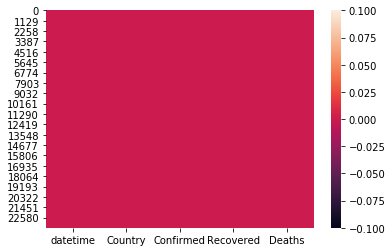

In [11]:
## checking the null values by using the heatmap :
sns.heatmap(covid.isnull())

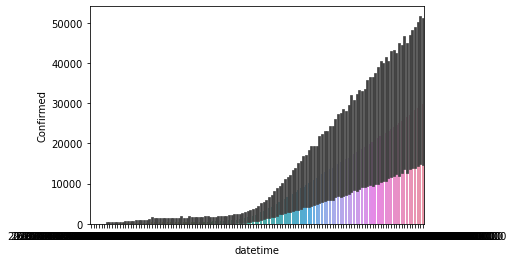

In [13]:
## Univariate analysis :
sns.barplot(x='datetime',y='Confirmed',data=covid)
plt.show()

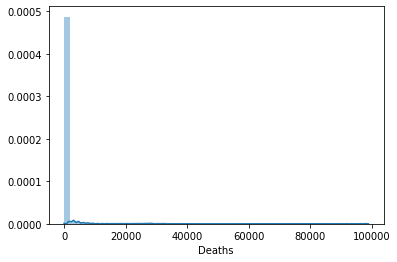

In [14]:
## Bivariate analysis :
sns.distplot(covid['Deaths'])

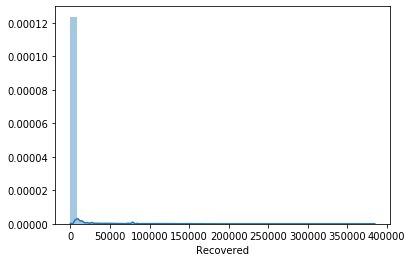

In [15]:
## Biavariate analysis using distplot :
sns.distplot(covid['Recovered'])

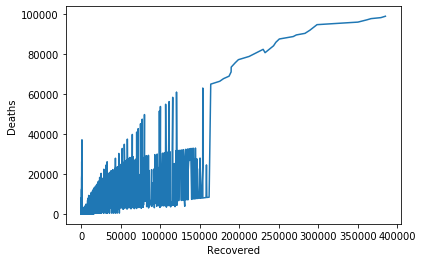

In [16]:
## lineplot using seanborn libraries :
sns.lineplot(x='Recovered',y='Deaths',data=covid)

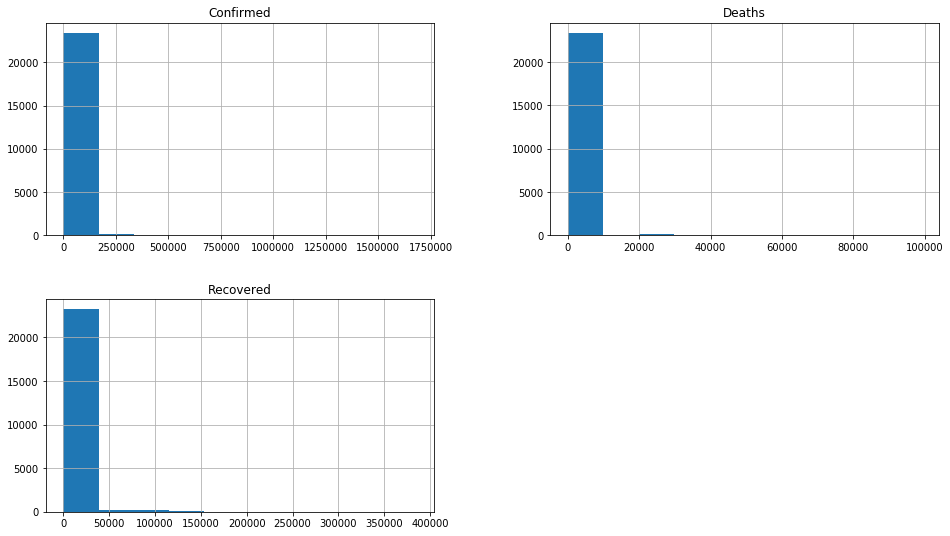

In [17]:
covid.hist(figsize=(16,9))
plt.show()

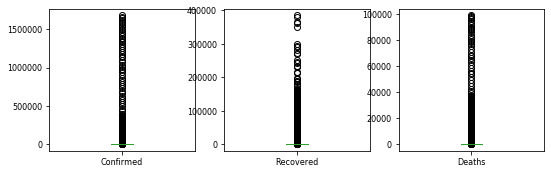

In [18]:
## checking outliers :
covid.plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(12,12))
plt.show()

In [19]:
## check skew data :
covid.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [20]:
## lets check head of the dataset :
covid.head()

,datetime,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [21]:
## drop the datetime column :
covid.drop('datetime',axis=1,inplace=True)

In [22]:
covid.drop('Country',axis=1,inplace=True)

In [23]:
covid.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [24]:
covid.head()

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [25]:
## seperate the X and Y (input and output) :
X=covid.drop('Confirmed',axis=1)
y=covid['Confirmed']

In [26]:
covid.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [27]:
for i in covid.columns:
    if covid.skew().loc[i]>0.55:
        covid[i]=np.log1p(covid[i])

In [29]:
covid.skew()

Confirmed    0.538470
Recovered    0.344030
Deaths       0.754847
dtype: float64

In [30]:
for i in covid.columns:
    if covid.skew().loc[i]>0.55:
        covid[i]=np.log1p(covid[i])
        

In [31]:
covid.skew()

Confirmed    0.538470
Recovered    0.344030
Deaths       0.512083
dtype: float64

In [32]:
## split the datatset into train and test :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=52)

In [33]:
## Cross validation :
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),X,y,cv=10,scoring='r2').mean()

0.7875376773251754

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=52)
lrg=linear_model.LinearRegression()
lrg.fit(X_train,y_train)
predm=lrg.predict(X_test)

In [35]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('r2 score is:',r2_score(y_test,predm))
print('mse score is:',np.sqrt(mean_squared_error(y_test,predm)))

r2 score is: 0.8555713301732137
mse score is: 17599.012429849714


In [37]:
import joblib
joblib.dump(covid,'covid_project')

['covid_project']

#Thank you